In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

sheet_id = "1uiQfhlb0isYp2JefSVzIJOngN0viwsP0PzcMab-dUw8"
sheet_name = "indian_liver_patient"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
 
df = pd.read_csv(url)

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df.columns = [i.lower() for i in df.columns]

for i in df.select_dtypes(include='object').columns:
    df[i] = df[i].apply(lambda x: x.lower())
 
df.reset_index(drop=True,inplace=True)
df.head()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset
0,65,female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## 🧾 Liver Function Test (LFT) – Ranges & Interpretation

| **Test**                                   | **Normal Range** | **Mild Elevation**          | **Moderate Elevation**     | **Severe Elevation**        | **Extreme Severe**                                        |
| ------------------------------------------ | ---------------- | --------------------------- | -------------------------- | --------------------------- | --------------------------------------------------------- |
| **Total Bilirubin**                        | 0.3 – 1.2 mg/dL  | 1.3 – 3.0 mg/dL             | 3.1 – 10 mg/dL             | 10 – 20 mg/dL               | >20 mg/dL (risk of severe jaundice, liver failure)        |
| **Direct Bilirubin**                       | 0.0 – 0.3 mg/dL  | 0.4 – 1.0 mg/dL             | 1.1 – 5.0 mg/dL            | 5.1 – 10 mg/dL              | >10 mg/dL (severe obstruction/liver failure)              |
| **ALP (Alkaline Phosphatase)**             | 44 – 147 U/L     | 148 – 250 U/L               | 251 – 1000 U/L             | 1001 – 2000 U/L             | >2000 U/L (advanced liver/bone disease)                   |
| **ALT (Alanine Aminotransferase, SGPT)**   | 7 – 56 U/L       | 57 – 150 U/L                | 151 – 500 U/L              | 501 – 2000 U/L              | >2000 U/L (acute viral/toxic/ischemic hepatitis)          |
| **AST (Aspartate Aminotransferase, SGOT)** | 8 – 45 U/L       | 46 – 120 U/L                | 121 – 400 U/L              | 401 – 2000 U/L              | >2000 U/L (acute hepatitis, shock liver, toxins)          |
| **Total Protein**                          | 6.0 – 8.3 g/dL   | 5.0 – 5.9 or 8.4 – 9.0 g/dL | 4.0 – 4.9 or 9.1 – 11 g/dL | 3.0 – 3.9 or 11.1 – 12 g/dL | <3.0 or >12 g/dL (life-threatening malnutrition, myeloma) |
| **Albumin**                                | 3.5 – 5.0 g/dL   | 3.0 – 3.4 g/dL              | 2.0 – 2.9 g/dL             | 1.5 – 1.9 g/dL              | <1.5 g/dL (severe edema, ascites, critical illness)       |
| **Globulin**                               | 2.0 – 3.5 g/dL   | 3.6 – 4.5 g/dL              | 4.6 – 6.0 g/dL             | 6.1 – 8.0 g/dL              | >8.0 g/dL (multiple myeloma, advanced autoimmune disease) |
| **A/G Ratio**                              | 1.0 – 2.0        | 0.8 – 0.9 or >2.1           | 0.6 – 0.7 or >2.3          | 0.4 – 0.5 or >2.5           | <0.4 (severe liver/kidney disease, myeloma)               |


In [2]:
df[df['total_bilirubin'] > 2]['dataset'].value_counts()

dataset
1    157
2     11
Name: count, dtype: int64

In [3]:
df[df['direct_bilirubin'] > 1]['dataset'].value_counts()

dataset
1    153
2      8
Name: count, dtype: int64

In [4]:
df[df['alkaline_phosphotase'] > 150]['dataset'].value_counts()

dataset
1    368
2    140
Name: count, dtype: int64

In [5]:
df[df['alamine_aminotransferase'] > 50]['dataset'].value_counts() 

dataset
1    159
2     22
Name: count, dtype: int64

In [6]:
df[df['aspartate_aminotransferase'] > 50]['dataset'].value_counts() 

dataset
1    205
2     33
Name: count, dtype: int64

In [7]:
df[df['total_protiens'] > 4.5]['dataset'].value_counts() 

dataset
1    384
2    156
Name: count, dtype: int64

In [8]:
df[df['albumin'] < 3]['dataset'].value_counts() 

dataset
1    175
2     47
Name: count, dtype: int64

In [9]:
df[df['albumin_and_globulin_ratio'] < 1]['dataset'].value_counts() 

dataset
1    224
2     64
Name: count, dtype: int64

In [10]:
df['AST/ALT_ratio'] = df['aspartate_aminotransferase'] / df['alamine_aminotransferase']

In [11]:
df.drop('dataset',axis=1,inplace=True)
df = df[['age', 'gender', 'total_bilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'AST/ALT_ratio', 'total_protiens', 'albumin',
       'albumin_and_globulin_ratio' ]]
df

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,AST/ALT_ratio,total_protiens,albumin,albumin_and_globulin_ratio
0,65,female,0.7,0.1,187,16,18,1.125000,6.8,3.3,0.90
1,62,male,10.9,5.5,699,64,100,1.562500,7.5,3.2,0.74
2,62,male,7.3,4.1,490,60,68,1.133333,7.0,3.3,0.89
3,58,male,1.0,0.4,182,14,20,1.428571,6.8,3.4,1.00
4,72,male,3.9,2.0,195,27,59,2.185185,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...,...
561,60,male,0.5,0.1,500,20,34,1.700000,5.9,1.6,0.37
562,40,male,0.6,0.1,98,35,31,0.885714,6.0,3.2,1.10
563,52,male,0.8,0.2,245,48,49,1.020833,6.4,3.2,1.00
564,31,male,1.3,0.5,184,29,32,1.103448,6.8,3.4,1.00


In [12]:
def flag(row):
    cld_criteria = 0
    
    # Abnormal ranges
    if row['total_bilirubin'] > 1.2:
        cld_criteria += 1
    if row['direct_bilirubin'] > 0.3:
        cld_criteria += 1
    if row['alkaline_phosphotase'] > 147:
        cld_criteria += 1
    if row['alamine_aminotransferase'] > 56:
        cld_criteria += 1
    if row['aspartate_aminotransferase'] > 45:
        cld_criteria += 1
    if row['AST/ALT_ratio'] > 1:
        cld_criteria += 1
    if (row['total_protiens'] < 6.0) or (row['total_protiens'] > 8.3):
        cld_criteria += 1
    if row['albumin'] < 3.5:
        cld_criteria += 1
    if (row['albumin_and_globulin_ratio'] < 1) or (row['albumin_and_globulin_ratio'] > 2):
        cld_criteria += 1

    # Severity classification
    if cld_criteria == 0:
        return 'normal'
    elif cld_criteria < 3:
        return 'mild'
    elif cld_criteria < 6:
        return 'moderate_cld'
    else:
        return 'severe_cld'


In [13]:
df['class'] = df.apply(flag,axis=1)
df['class'].value_counts()

class
moderate_cld    237
severe_cld      211
mild            113
normal            5
Name: count, dtype: int64

In [14]:
df

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,AST/ALT_ratio,total_protiens,albumin,albumin_and_globulin_ratio,class
0,65,female,0.7,0.1,187,16,18,1.125000,6.8,3.3,0.90,moderate_cld
1,62,male,10.9,5.5,699,64,100,1.562500,7.5,3.2,0.74,severe_cld
2,62,male,7.3,4.1,490,60,68,1.133333,7.0,3.3,0.89,severe_cld
3,58,male,1.0,0.4,182,14,20,1.428571,6.8,3.4,1.00,moderate_cld
4,72,male,3.9,2.0,195,27,59,2.185185,7.3,2.4,0.40,severe_cld
...,...,...,...,...,...,...,...,...,...,...,...,...
561,60,male,0.5,0.1,500,20,34,1.700000,5.9,1.6,0.37,moderate_cld
562,40,male,0.6,0.1,98,35,31,0.885714,6.0,3.2,1.10,mild
563,52,male,0.8,0.2,245,48,49,1.020833,6.4,3.2,1.00,moderate_cld
564,31,male,1.3,0.5,184,29,32,1.103448,6.8,3.4,1.00,moderate_cld


In [15]:
df.isna().sum()

age                           0
gender                        0
total_bilirubin               0
direct_bilirubin              0
alkaline_phosphotase          0
alamine_aminotransferase      0
aspartate_aminotransferase    0
AST/ALT_ratio                 0
total_protiens                0
albumin                       0
albumin_and_globulin_ratio    0
class                         0
dtype: int64

In [16]:
cat_col = df.select_dtypes(include='object').drop(['class'],axis=1)
num_col = df.select_dtypes(exclude='object')
y = df['class']

In [17]:
for i in num_col.columns:
    px.histogram(df,x=i,color='class').show()

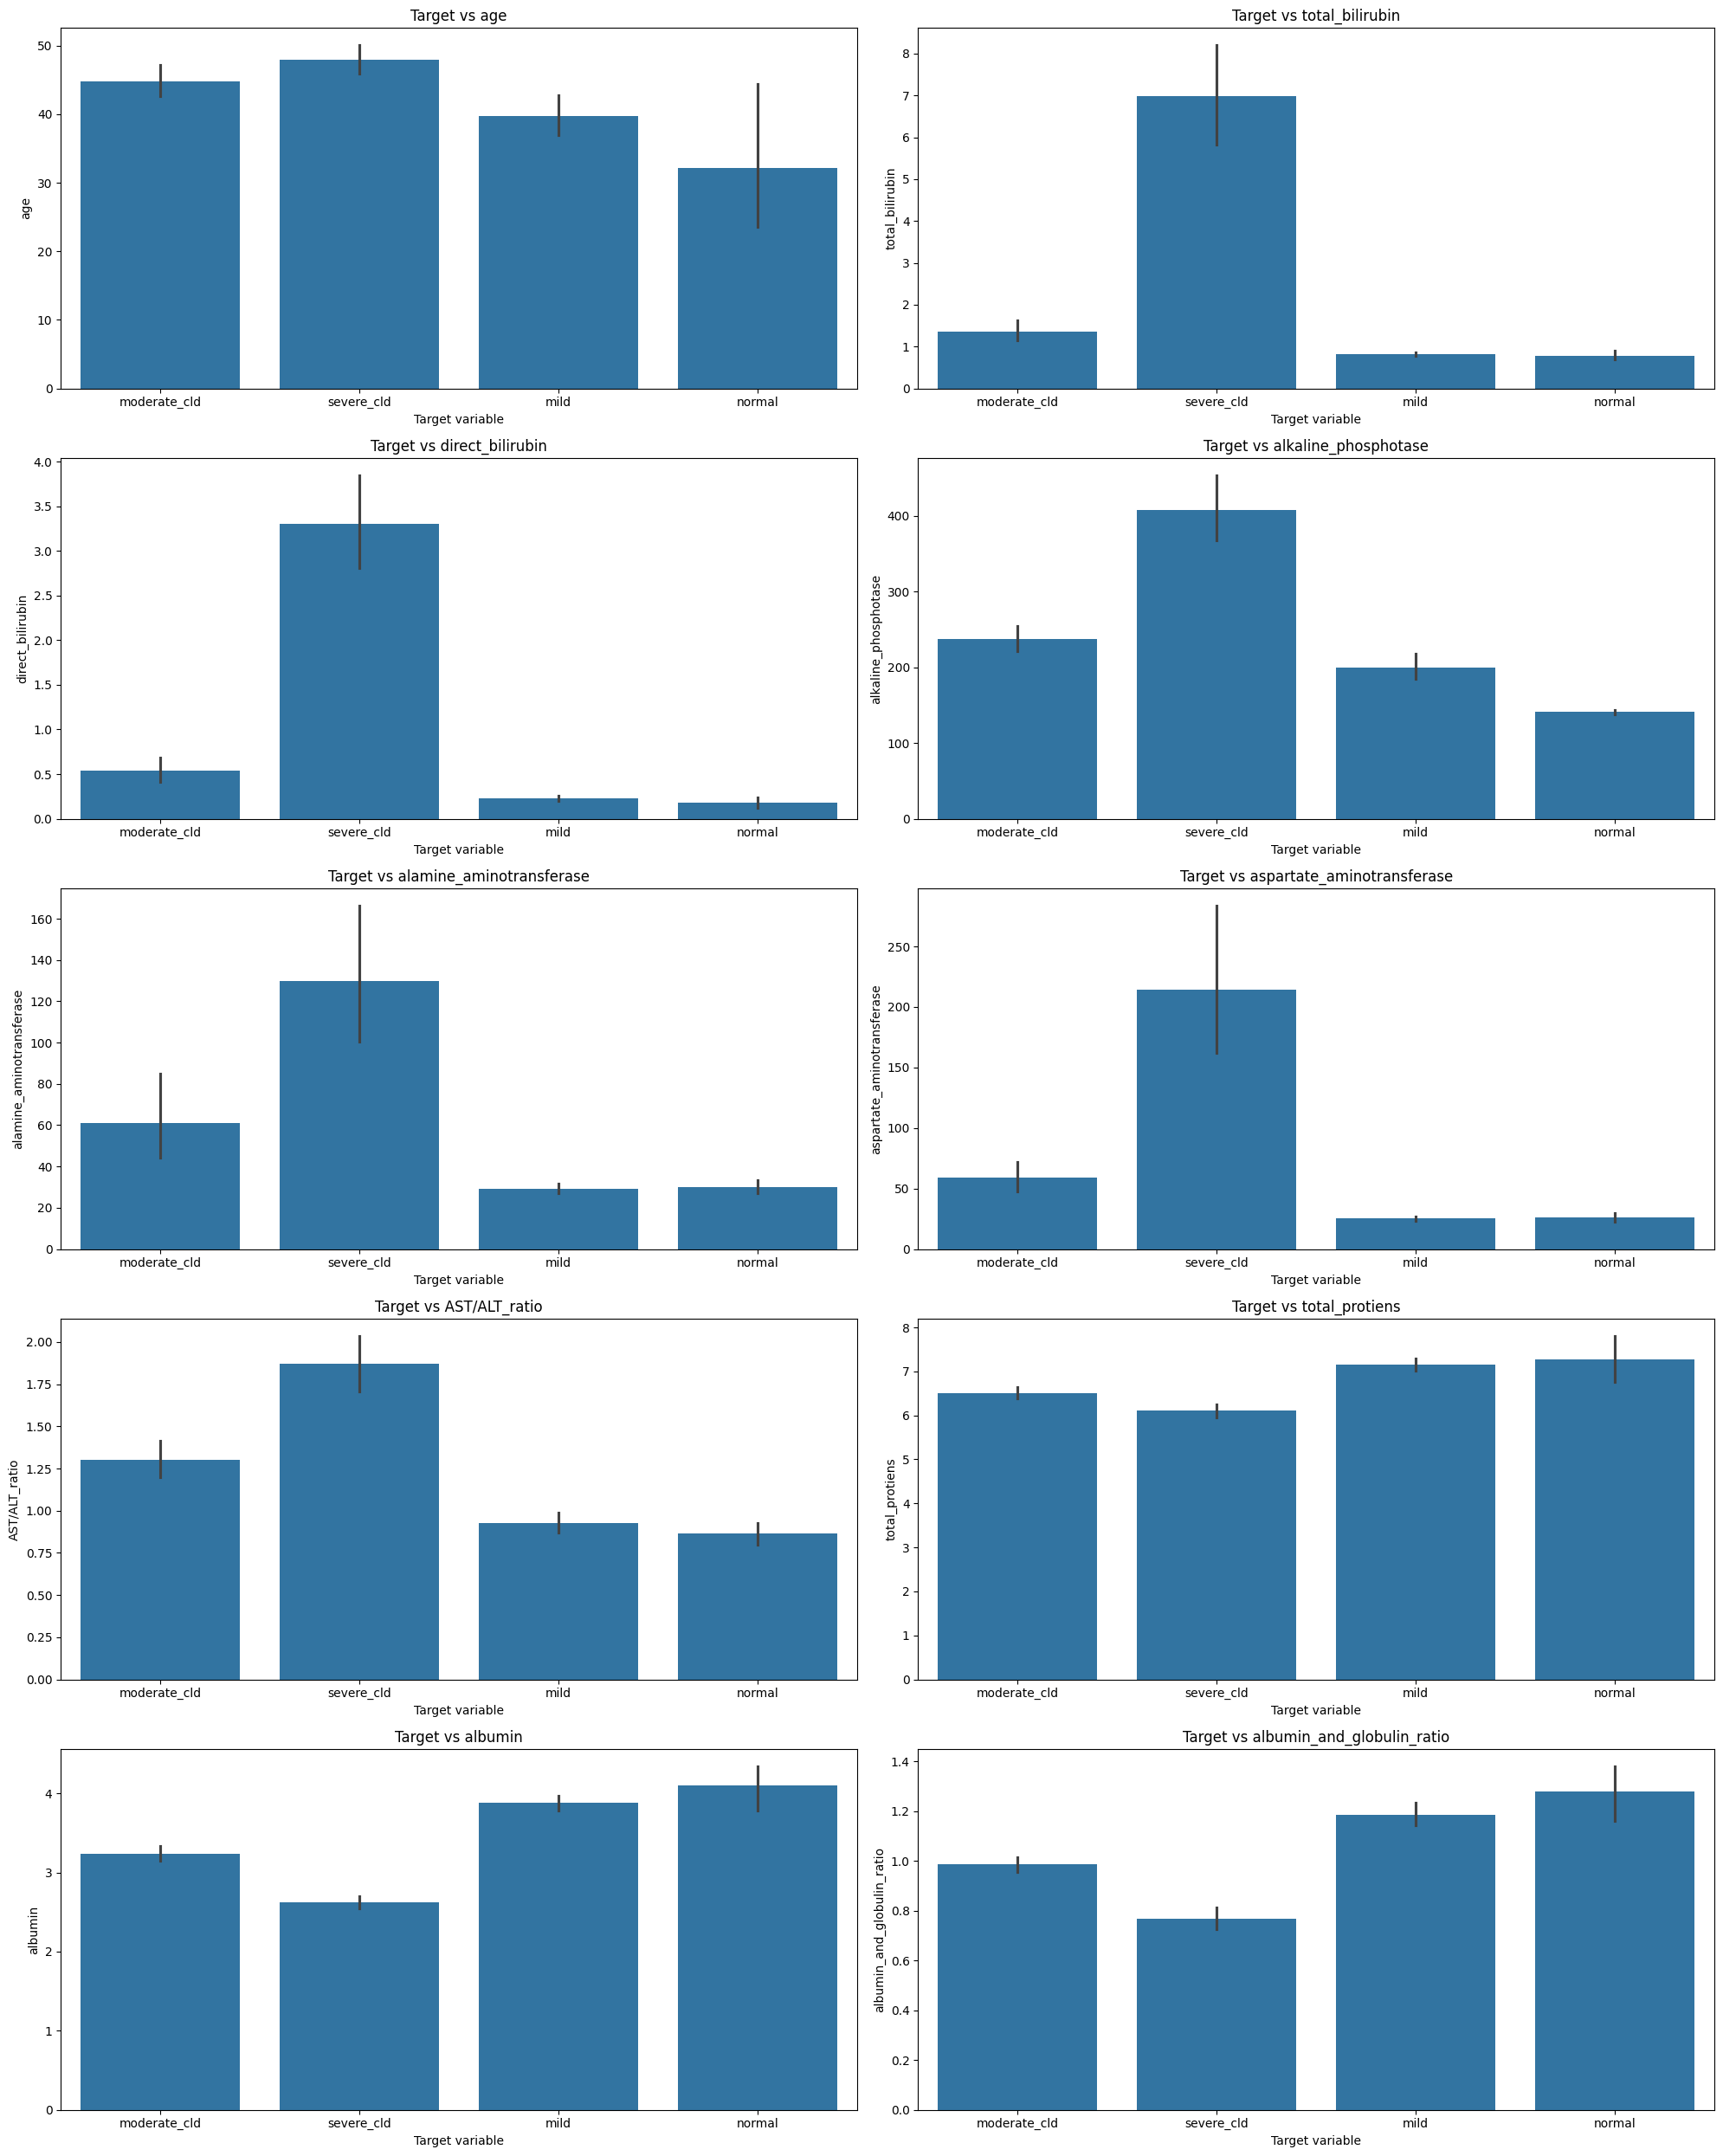

In [18]:
n_col =2 
n_row = (len(num_col.columns) + 1) // n_col

fig, ax = plt.subplots(n_row, n_col, figsize=(20, 5*n_row))
ax = ax.flatten()

for i,col in enumerate(num_col.columns):
    sns.barplot(df,x = 'class', y = col,ax = ax[i])
    ax[i].set_title(f"Target vs {col}")
    ax[i].set_xlabel("Target variable")
    
plt.tight_layout()
plt.show()

### Anova Test

In [19]:
df[df['class'] == 'normal']['age'].to_list()

[21, 26, 33, 25, 56]

In [20]:
from scipy.stats import f_oneway

RL = []
for i in df.select_dtypes(exclude='object'):

    print(25*'-',i,25*'-')
    # Test scores from 4 different classes
    class_a = df[df['class'] == 'normal'][i].to_list()
    class_b = df[df['class'] == 'mild'][i].to_list()
    class_c = df[df['class'] == 'moderate_cld'][i].to_list()
    class_d = df[df['class'] == 'severe_cld'][i].to_list()


    # Perform one-way ANOVA
    f_stat, p_val = f_oneway(class_a, class_b, class_c)

    print(f"F-statistic: {f_stat:.4f}")
    print(f"p-value: {p_val:.4f}")

    # Interpret result
    alpha = 0.05
    if p_val < alpha:
        print("Reject the null hypothesis: At least one group is significantly different.")
        RL.append(i)
    else:
        print("Fail to reject the null hypothesis: No significant difference.")
    
    print(50*"*")
print(RL)

------------------------- age -------------------------
F-statistic: 4.6637
p-value: 0.0100
Reject the null hypothesis: At least one group is significantly different.
**************************************************
------------------------- total_bilirubin -------------------------
F-statistic: 4.8725
p-value: 0.0082
Reject the null hypothesis: At least one group is significantly different.
**************************************************
------------------------- direct_bilirubin -------------------------
F-statistic: 4.8452
p-value: 0.0084
Reject the null hypothesis: At least one group is significantly different.
**************************************************
------------------------- alkaline_phosphotase -------------------------
F-statistic: 4.7399
p-value: 0.0093
Reject the null hypothesis: At least one group is significantly different.
**************************************************
------------------------- alamine_aminotransferase -------------------------
F-statist

In [21]:
pd.crosstab(df['gender'],df['class'])

class,mild,moderate_cld,normal,severe_cld
gender,,,,
female,46,53,3,36
male,67,184,2,175


In [22]:
from scipy.stats import chi2_contingency

# Observed table (actual survey)
data = pd.crosstab(df['gender'],df['class'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(data)

print("Chi-Square Statistic:", round(chi2, 2))
print("Degrees of Freedom:", dof)
print("p-value:", round(p, 4))
print("Expected Frequencies:\n", expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis → gender and class are related.")
else:
    print("Fail to reject null hypothesis → No relationship.")

Chi-Square Statistic: 26.43
Degrees of Freedom: 3
p-value: 0.0
Expected Frequencies:
 [[ 27.55123675  57.7844523    1.21908127  51.44522968]
 [ 85.44876325 179.2155477    3.78091873 159.55477032]]
Reject the null hypothesis → gender and class are related.


In [23]:
df.columns

Index(['age', 'gender', 'total_bilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'AST/ALT_ratio', 'total_protiens',
       'albumin', 'albumin_and_globulin_ratio', 'class'],
      dtype='object')

In [24]:
from sklearn.preprocessing import LabelEncoder
LE =LabelEncoder()
cat_col_En = pd.DataFrame(LE.fit_transform(cat_col),columns=cat_col.columns)

In [25]:
y = y.replace({
        'normal' : 0,
        'mild' : 1,
        'moderate_cld' : 2,
        'severe_cld' :3
    })

In [26]:
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
num_col_sc = pd.DataFrame(RS.fit_transform(num_col),columns=RS.get_feature_names_out())
num_col_sc

,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,AST/ALT_ratio,total_protiens,albumin,albumin_and_globulin_ratio
0,0.80,-0.166667,-0.181818,-0.172131,-0.503311,-0.370968,-0.048097,0.142857,0.166667,-0.125
1,0.68,5.500000,4.727273,4.024590,0.768212,0.951613,0.456921,0.642857,0.083333,-0.525
2,0.68,3.500000,3.454545,2.311475,0.662252,0.435484,-0.038478,0.285714,0.166667,-0.150
3,0.52,0.000000,0.090909,-0.213115,-0.556291,-0.338710,0.302324,0.142857,0.250000,0.125
4,1.08,1.611111,1.545455,-0.106557,-0.211921,0.290323,1.175704,0.500000,-0.583333,-1.375
...,...,...,...,...,...,...,...,...,...,...
561,0.60,-0.277778,-0.181818,2.393443,-0.397351,-0.112903,0.615641,-0.500000,-1.250000,-1.450
562,-0.20,-0.222222,-0.181818,-0.901639,0.000000,-0.161290,-0.324311,-0.428571,0.083333,0.375
563,0.28,-0.111111,-0.090909,0.303279,0.344371,0.129032,-0.168339,-0.142857,0.083333,0.125
564,-0.56,0.166667,0.181818,-0.196721,-0.158940,-0.145161,-0.072975,0.142857,0.250000,0.125


In [27]:
x = pd.concat([cat_col_En,num_col_sc],axis=1)
x

,gender,age,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,AST/ALT_ratio,total_protiens,albumin,albumin_and_globulin_ratio
0,0,0.80,-0.166667,-0.181818,-0.172131,-0.503311,-0.370968,-0.048097,0.142857,0.166667,-0.125
1,1,0.68,5.500000,4.727273,4.024590,0.768212,0.951613,0.456921,0.642857,0.083333,-0.525
2,1,0.68,3.500000,3.454545,2.311475,0.662252,0.435484,-0.038478,0.285714,0.166667,-0.150
3,1,0.52,0.000000,0.090909,-0.213115,-0.556291,-0.338710,0.302324,0.142857,0.250000,0.125
4,1,1.08,1.611111,1.545455,-0.106557,-0.211921,0.290323,1.175704,0.500000,-0.583333,-1.375
...,...,...,...,...,...,...,...,...,...,...,...
561,1,0.60,-0.277778,-0.181818,2.393443,-0.397351,-0.112903,0.615641,-0.500000,-1.250000,-1.450
562,1,-0.20,-0.222222,-0.181818,-0.901639,0.000000,-0.161290,-0.324311,-0.428571,0.083333,0.375
563,1,0.28,-0.111111,-0.090909,0.303279,0.344371,0.129032,-0.168339,-0.142857,0.083333,0.125
564,1,-0.56,0.166667,0.181818,-0.196721,-0.158940,-0.145161,-0.072975,0.142857,0.250000,0.125


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,
                                                 stratify=y,
                                                 random_state=42,
                                                 shuffle=True)

In [29]:
y_train.value_counts()

class
2    189
3    169
1     90
0      4
Name: count, dtype: int64

In [30]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler()
x_train, y_train = ROS.fit_resample(x_train, y_train)

y_train.value_counts()
# Due to minarity class very low

class
1    189
3    189
2    189
0    189
Name: count, dtype: int64

In [31]:
x_train.duplicated().sum()

np.int64(304)

In [32]:
# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix

In [33]:
# Assign the models to a dictionary
model = {
    'LogisticRegression' : LogisticRegression(class_weight='balanced'),
    'SVC' : SVC(class_weight='balanced'),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier(class_weight='balanced'),
    'RandomForestClassifier' : RandomForestClassifier(class_weight='balanced'),
    'GaussianNB' : GaussianNB(),
    
}

LogisticRegression
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       189
           1       0.82      0.72      0.77       189
           2       0.75      0.74      0.74       189
           3       0.89      0.84      0.86       189

    accuracy                           0.82       756
   macro avg       0.82      0.82      0.82       756
weighted avg       0.82      0.82      0.82       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.12      1.00      0.22         1
           1       0.62      0.70      0.65        23
           2       0.80      0.69      0.74        48
           3       0.87 

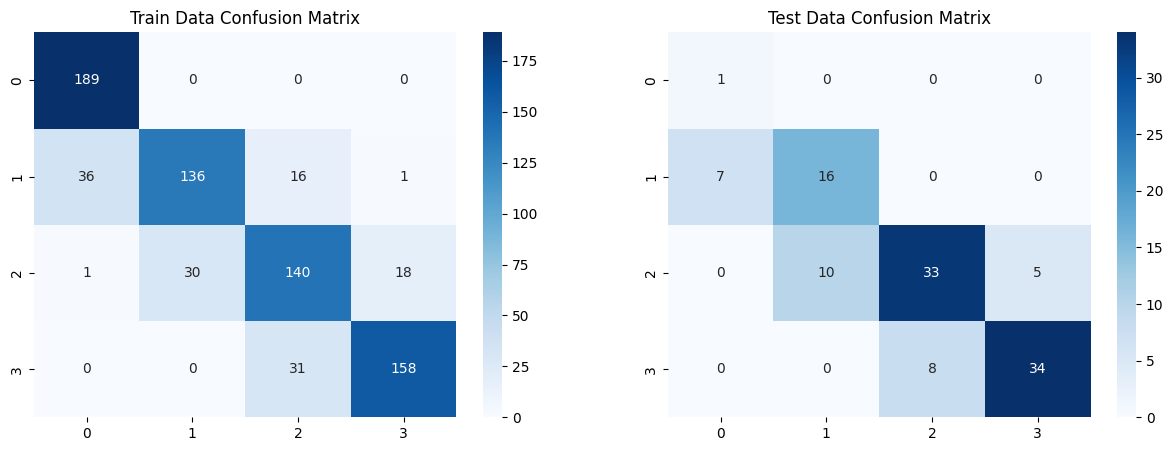

***************************************************************************
SVC
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.65      1.00      0.78       189
           1       0.64      0.39      0.49       189
           2       0.75      0.66      0.70       189
           3       0.91      0.87      0.89       189

    accuracy                           0.73       756
   macro avg       0.74      0.73      0.71       756
weighted avg       0.74      0.73      0.71       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.05      1.00      0.10         1
           1       0.43      0.39      0.41        23
           2     

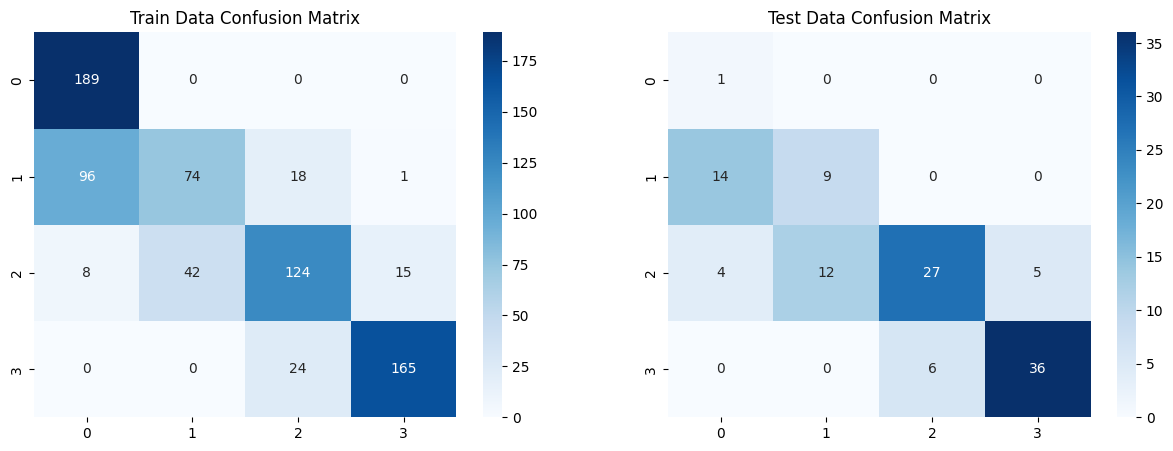

***************************************************************************
KNeighborsClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       189
           1       0.85      0.93      0.88       189
           2       0.87      0.76      0.81       189
           3       0.92      0.93      0.92       189

    accuracy                           0.90       756
   macro avg       0.90      0.90      0.90       756
weighted avg       0.90      0.90      0.90       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.48      0.70      0.57        23


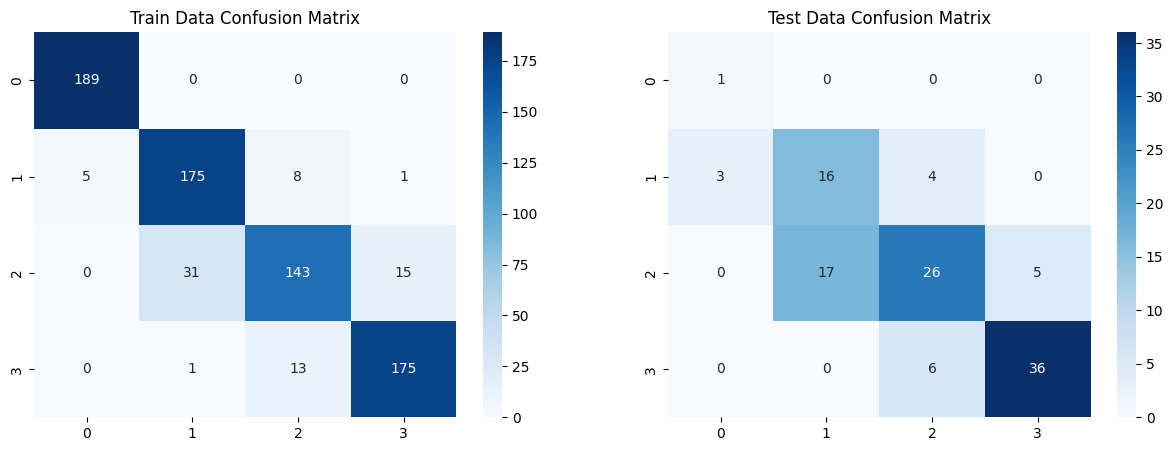

***************************************************************************
DecisionTreeClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       189
           2       1.00      1.00      1.00       189
           3       1.00      1.00      1.00       189

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.83      0.87      0.85        2

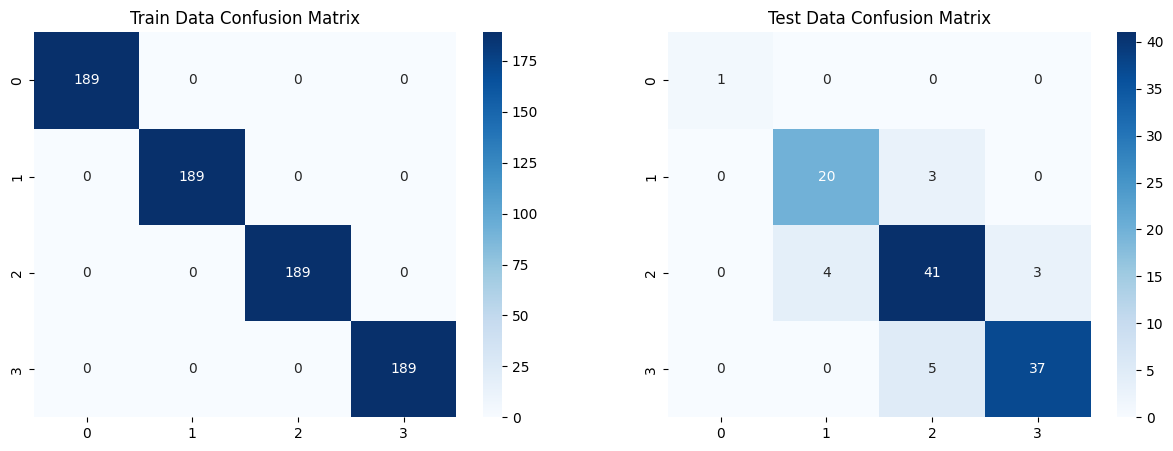

***************************************************************************
RandomForestClassifier
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       189
           2       1.00      1.00      1.00       189
           3       1.00      1.00      1.00       189

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.88      0.96      0.92        2

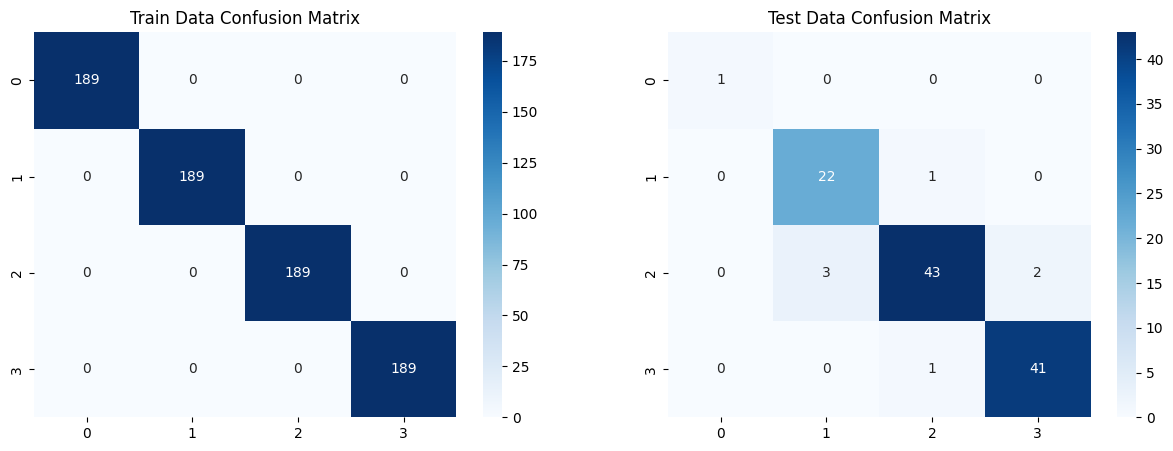

***************************************************************************
GaussianNB
***************************************************************************
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       189
           1       0.65      0.93      0.77       189
           2       0.47      0.44      0.45       189
           3       0.89      0.53      0.66       189

    accuracy                           0.72       756
   macro avg       0.74      0.72      0.72       756
weighted avg       0.74      0.72      0.72       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.44      0.96      0.60        23
          

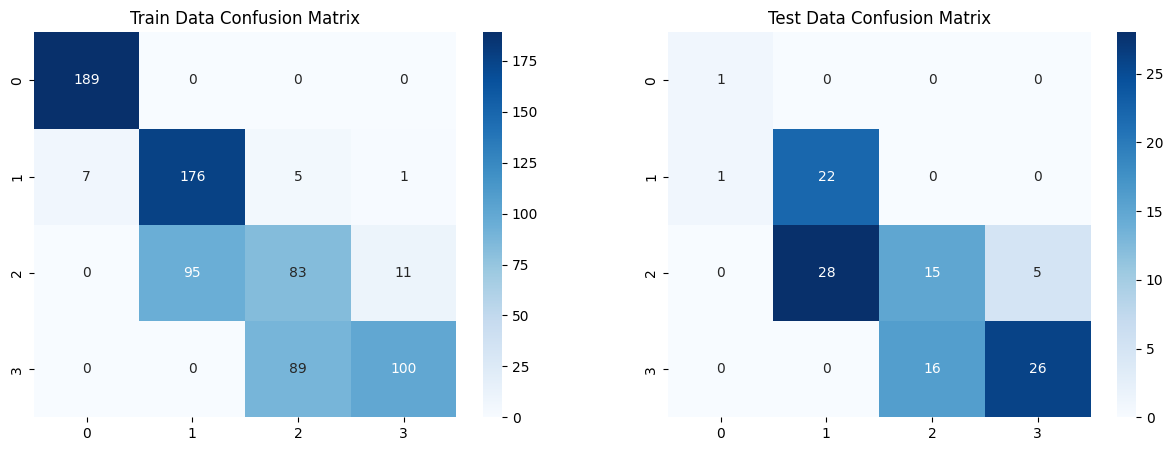

***************************************************************************


In [34]:
for i in model:
    print(i)
    print(75*'*')
    model[i].fit(x_train,y_train)
    y_train_pread = model[i].predict(x_train)
    y_test_pread = model[i].predict(x_test)
    
    print(25*"-","Train Data Matrix Report",25*"-")

    print(classification_report(y_train, y_train_pread))
    print(75*"-")
    print(25*"-","Test Data Matrix Report",25*"-")
    print(classification_report(y_test, y_test_pread))
    print(75*"-")

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
    ax[0].set_title('Train Data Confusion Matrix')

    sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
    ax[1].set_title('Test Data Confusion Matrix')

    plt.show()
    print(75*'*')

In [35]:
y_train.value_counts()

class
1    189
3    189
2    189
0    189
Name: count, dtype: int64

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       0.97      0.97      0.97       189
           2       0.94      0.93      0.93       189
           3       0.96      0.96      0.96       189

    accuracy                           0.97       756
   macro avg       0.97      0.97      0.97       756
weighted avg       0.97      0.97      0.97       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.81      0.96      0.88        23
           2       0.88      0.77      0.82        48
           3       0.86      0.90      0.88        42

    accuracy                           0.86       114
   macro a

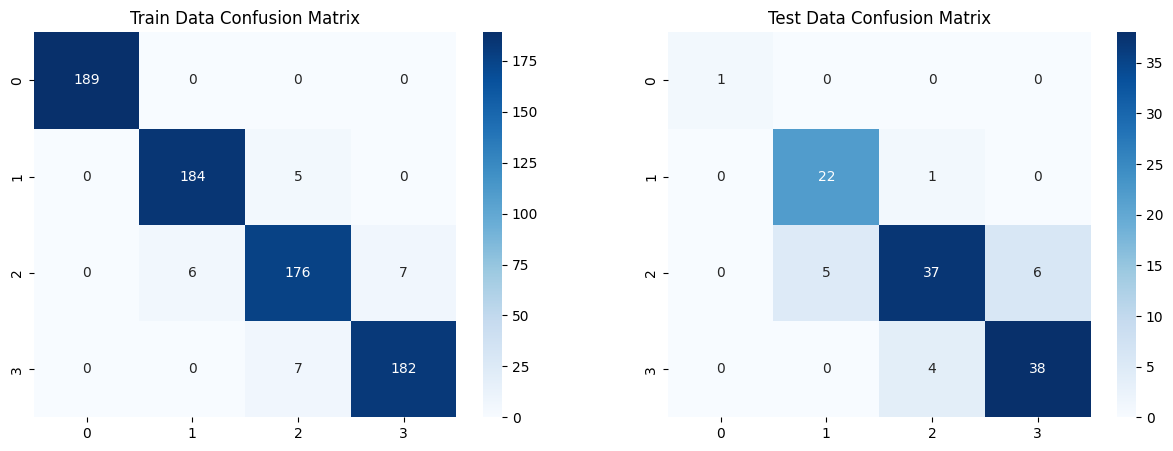

***************************************************************************


In [36]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=5,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=3
    
)
RFC.fit(x_train, y_train)

y_train_pread = RFC.predict(x_train)
y_test_pread = RFC.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 500),      # reduce complexity
    'max_depth': randint(5, 30),           # restrict depth
    'min_samples_split': randint(5, 20),   # require more samples before split
    'min_samples_leaf': randint(3, 15),    # avoid tiny leaves
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],                   # usually better for generalization
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy']
}


RFC = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=RFC,
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations (increase for wider search)
    cv=5,        # Stratified by default; use StratifiedKFold if needed
    scoring='f1_macro',  # Optimizes for imbalanced classes
    random_state=42,
    n_jobs=-1,   # Parallelize
    verbose=1
)

random_search.fit(x_train,y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation F1-Macro Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 275}
Best Cross-Validation F1-Macro Score: 0.9561561889204283


------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       0.99      1.00      0.99       189
           2       1.00      0.99      0.99       189
           3       1.00      1.00      1.00       189

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.85      0.96      0.90        23
           2       0.93      0.85      0.89        48
           3       0.93      0.95      0.94        42

    accuracy                           0.91       114
   macro a

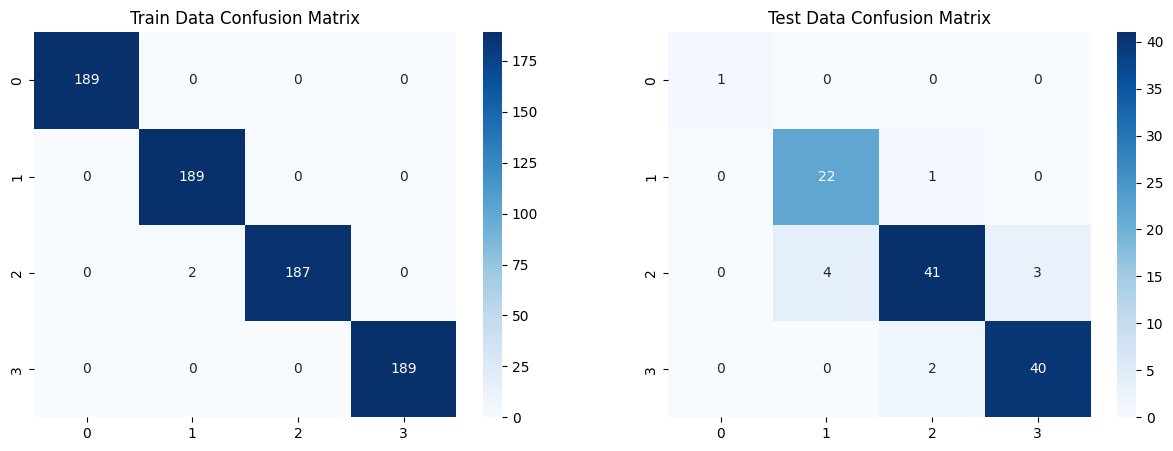

***************************************************************************


In [38]:
y_train_pread = random_search.predict(x_train)
y_test_pread = random_search.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       0.97      1.00      0.99       189
           2       1.00      0.96      0.98       189
           3       0.99      1.00      0.99       189

    accuracy                           0.99       756
   macro avg       0.99      0.99      0.99       756
weighted avg       0.99      0.99      0.99       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.88      1.00      0.94        23
           2       0.95      0.88      0.91        48
           3       0.93      0.95      0.94        42

    accuracy                           0.93       114
   macro a

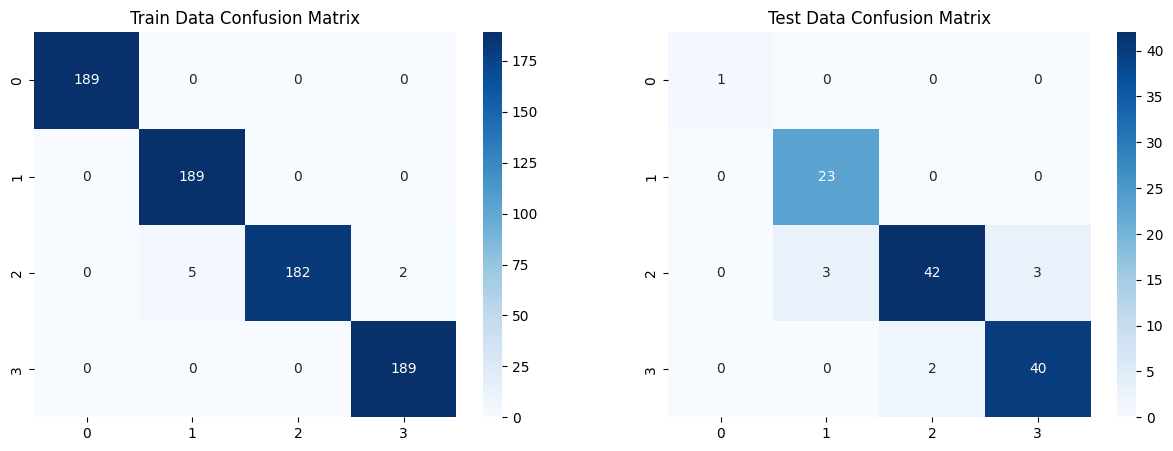

***************************************************************************


In [39]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(
        bootstrap = True, 
        class_weight = 'balanced', 
        criterion ='entropy', 
        max_depth = 5, 
        max_features = 'sqrt', 
        min_samples_leaf = 3, 
        min_samples_split = 5, 
        n_estimators= 100 
)
RFC.fit(x_train, y_train)

y_train_pread = RFC.predict(x_train)
y_test_pread = RFC.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

In [40]:
x1,y1 = ROS.fit_resample(x,y)
print(x1.duplicated().sum(),y1.value_counts())

382 class
2    237
3    237
1    237
0    237
Name: count, dtype: int64


382 class
2    237
3    237
1    237
0    237
Name: count, dtype: int64
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       0.97      1.00      0.99       189
           2       1.00      0.96      0.98       189
           3       0.99      1.00      0.99       189

    accuracy                           0.99       756
   macro avg       0.99      0.99      0.99       756
weighted avg       0.99      0.99      0.99       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       237
           1       0.97      1.00      0.98       237
           2       0.99      0.95      0.97       237
           3       0.98      0.99      0.99    

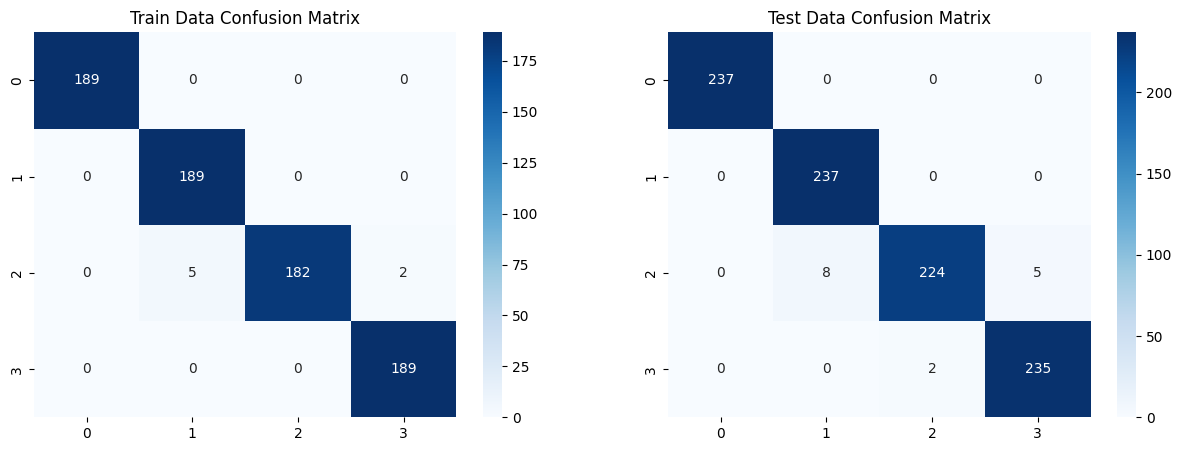

***************************************************************************


In [41]:
x1,y1 = ROS.fit_resample(x,y)
print(x1.duplicated().sum(),y1.value_counts())

y_train_pread = RFC.predict(x_train)
y_test_pread = RFC.predict(x1)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y1, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y1, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

Test Accuracy: 0.9122807017543859
------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       189
           2       1.00      1.00      1.00       189
           3       1.00      1.00      1.00       189

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.88      0.96      0.92        23
           2       0.90      0.90      0.90        48
           3       0.95      0.90      0.93        42

    accuracy                  

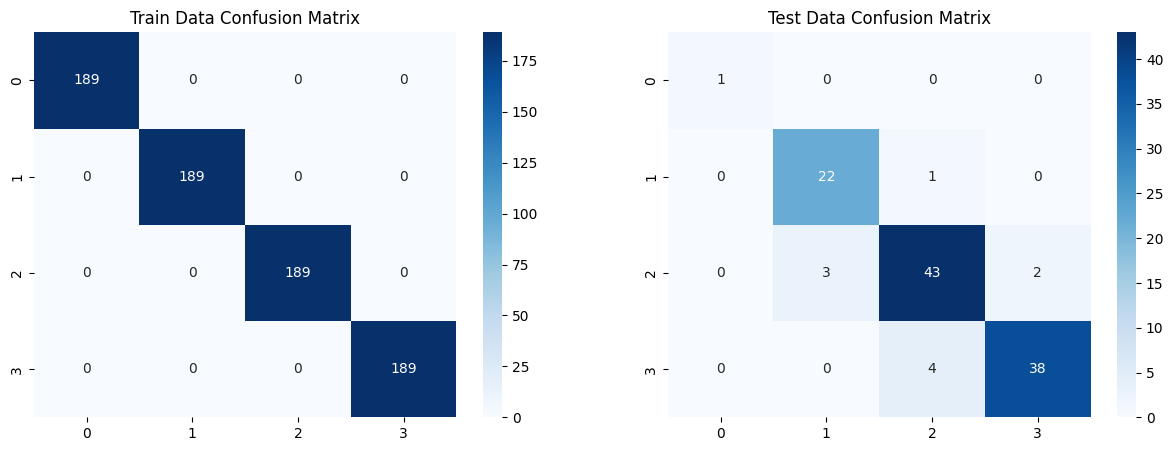

***************************************************************************


In [42]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,          # reduce or tune
    learning_rate=0.05,        # smaller learning rate
    max_depth=3,               # shallower trees
    subsample=0.8,             # row sampling
    colsample_bytree=0.8,      # feature sampling
    reg_alpha=0.1,             # L1 regularization
    reg_lambda=1.0,            # L2 regularization
    scale_pos_weight=1,        # adjust for imbalance if needed
    eval_metric="logloss",
    random_state=42
)

xgb.fit(x_train, y_train)
print("Test Accuracy:", xgb.score(x_test, y_test))


y_train_pread = xgb.predict(x_train)
y_test_pread = xgb.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pread))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pread))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pread),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pread),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

## Pipeline Build

In [43]:
df

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,AST/ALT_ratio,total_protiens,albumin,albumin_and_globulin_ratio,class
0,65,female,0.7,0.1,187,16,18,1.125000,6.8,3.3,0.90,moderate_cld
1,62,male,10.9,5.5,699,64,100,1.562500,7.5,3.2,0.74,severe_cld
2,62,male,7.3,4.1,490,60,68,1.133333,7.0,3.3,0.89,severe_cld
3,58,male,1.0,0.4,182,14,20,1.428571,6.8,3.4,1.00,moderate_cld
4,72,male,3.9,2.0,195,27,59,2.185185,7.3,2.4,0.40,severe_cld
...,...,...,...,...,...,...,...,...,...,...,...,...
561,60,male,0.5,0.1,500,20,34,1.700000,5.9,1.6,0.37,moderate_cld
562,40,male,0.6,0.1,98,35,31,0.885714,6.0,3.2,1.10,mild
563,52,male,0.8,0.2,245,48,49,1.020833,6.4,3.2,1.00,moderate_cld
564,31,male,1.3,0.5,184,29,32,1.103448,6.8,3.4,1.00,moderate_cld


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

In [45]:
cat_col_trans = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('Order',OrdinalEncoder(categories=[['female','male']],dtype='int64'))
    ]
)
cat_col_trans

,steps,"[('imputer', ...), ('Order', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,"[['female', 'male']]"


In [46]:
num_col_trans = Pipeline(
    steps=[
        ('imputer',KNNImputer(n_neighbors = 5)),
        ('scalar',RobustScaler())
    ]
)
num_col_trans

,steps,"[('imputer', ...), ('scalar', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,n_neighbors,5
,weights,'uniform'
,metric,'nan_euclidean'
,copy,True
,add_indicator,False
,keep_empty_features,False


In [47]:
preprocess = ColumnTransformer(
    transformers=[
        ('cat', cat_col_trans, cat_col.columns),
        ('num', num_col_trans, num_col.columns)
    ]
)
preprocess

,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [48]:
model = Pipeline(
    steps=[
        ('preprocessor', preprocess),
        ('Random Forest Classification',RandomForestClassifier(
                                                bootstrap = True, 
                                                class_weight = 'balanced', 
                                                criterion ='entropy', 
                                                max_depth = 5, 
                                                max_features = 'sqrt', 
                                                min_samples_leaf = 3, 
                                                min_samples_split = 5, 
                                                n_estimators= 100 
                                        ))
        
    ]
)
model

,steps,"[('preprocessor', ...), ('Random Forest Classification', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [49]:
model.fit(df.drop(['class'],axis=1),y)

,steps,"[('preprocessor', ...), ('Random Forest Classification', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [50]:
y_pr = model.predict(df.drop(['class'],axis=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.95      1.00      0.97       113
           2       0.98      0.95      0.97       237
           3       0.98      0.98      0.98       211

    accuracy                           0.97       566
   macro avg       0.98      0.98      0.98       566
weighted avg       0.97      0.97      0.97       566



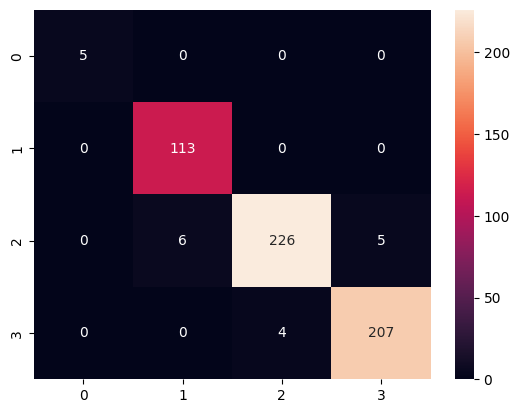

In [51]:
print(classification_report(y,y_pr))
sns.heatmap(confusion_matrix(y,y_pr),annot=True,fmt='d')
plt.show()

In [52]:
dfdff d import pickle
#### pickle.dump(model,open('cld_model.pkl','wb'))

SyntaxError: invalid syntax (4294001993.py, line 1)

In [53]:
df.columns

Index(['age', 'gender', 'total_bilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'AST/ALT_ratio', 'total_protiens',
       'albumin', 'albumin_and_globulin_ratio', 'class'],
      dtype='object')

In [61]:
set(df.columns ==['age', 'gender', 'total_bilirubin', 'direct_bilirubin',
                            'alkaline_phosphotase', 'alamine_aminotransferase',
                            'aspartate_aminotransferase', 'AST/ALT_ratio', 'total_protiens',
                            'albumin', 'albumin_and_globulin_ratio', 'class']) == {True}
                                    

True

In [62]:
df.columns

Index(['age', 'gender', 'total_bilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'AST/ALT_ratio', 'total_protiens',
       'albumin', 'albumin_and_globulin_ratio', 'class'],
      dtype='object')

In [65]:
if 'AST/ALT_rati0' in df.columns:
    print(1)

In [66]:
y.value_counts()

class
2    237
3    211
1    113
0      5
Name: count, dtype: int64

In [67]:
df['class'].value_counts()

class
moderate_cld    237
severe_cld      211
mild            113
normal            5
Name: count, dtype: int64

In [68]:
df

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,AST/ALT_ratio,total_protiens,albumin,albumin_and_globulin_ratio,class
0,65,female,0.7,0.1,187,16,18,1.125000,6.8,3.3,0.90,moderate_cld
1,62,male,10.9,5.5,699,64,100,1.562500,7.5,3.2,0.74,severe_cld
2,62,male,7.3,4.1,490,60,68,1.133333,7.0,3.3,0.89,severe_cld
3,58,male,1.0,0.4,182,14,20,1.428571,6.8,3.4,1.00,moderate_cld
4,72,male,3.9,2.0,195,27,59,2.185185,7.3,2.4,0.40,severe_cld
...,...,...,...,...,...,...,...,...,...,...,...,...
561,60,male,0.5,0.1,500,20,34,1.700000,5.9,1.6,0.37,moderate_cld
562,40,male,0.6,0.1,98,35,31,0.885714,6.0,3.2,1.10,mild
563,52,male,0.8,0.2,245,48,49,1.020833,6.4,3.2,1.00,moderate_cld
564,31,male,1.3,0.5,184,29,32,1.103448,6.8,3.4,1.00,moderate_cld
